In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
ds, meta=tfds.load('citrus_leaves',with_info=True,split='train', shuffle_files=True)
ds=ds.batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/594 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/citrus_leaves/0.1.2.incompleteBQ9PSB/citrus_leaves-train.tfrecord*...:   0…

Dataset citrus_leaves downloaded and prepared to /root/tensorflow_datasets/citrus_leaves/0.1.2. Subsequent calls will reuse this data.


In [3]:
import matplotlib.pyplot as plt


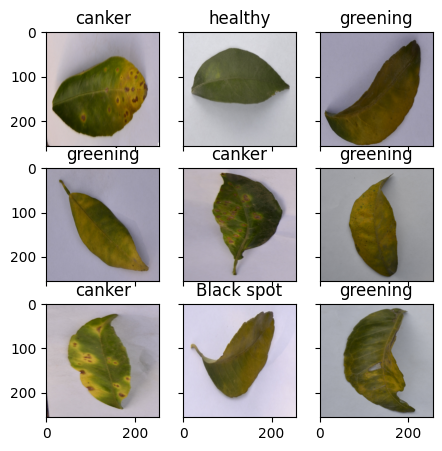

In [5]:
# Take one batch from dataset and display the images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5,5))

for sample in ds.take(1):
    images, labels = sample["image"], sample["label"]
    # print(labels)
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(meta.features['label'].int2str(labels[i*3+j]))
plt.show()

In [6]:
out_height, out_width = 128,256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)

flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)

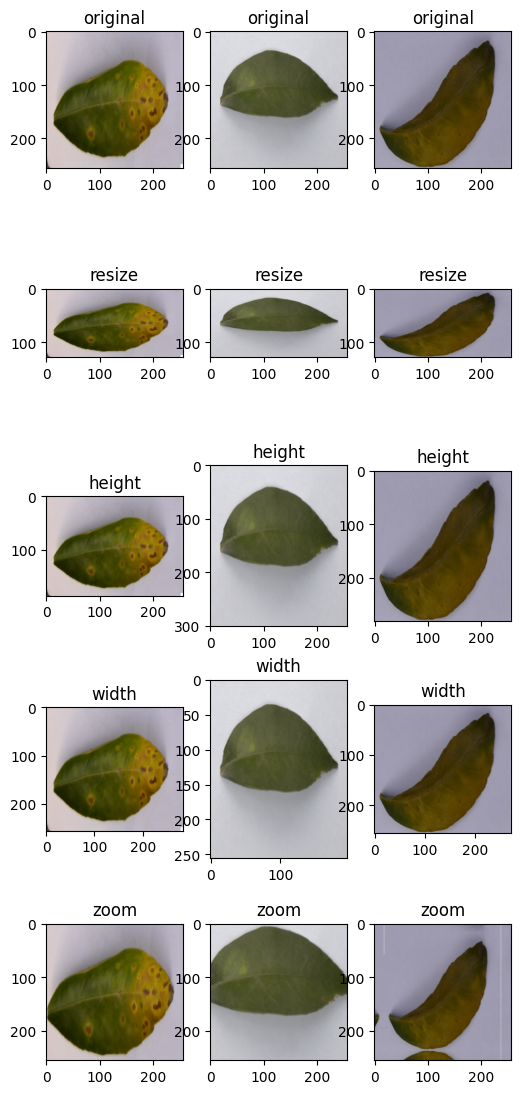

In [11]:
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # height
        ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("height")
        # width
        ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("width")
        # zoom
        ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("zoom")
plt.show()

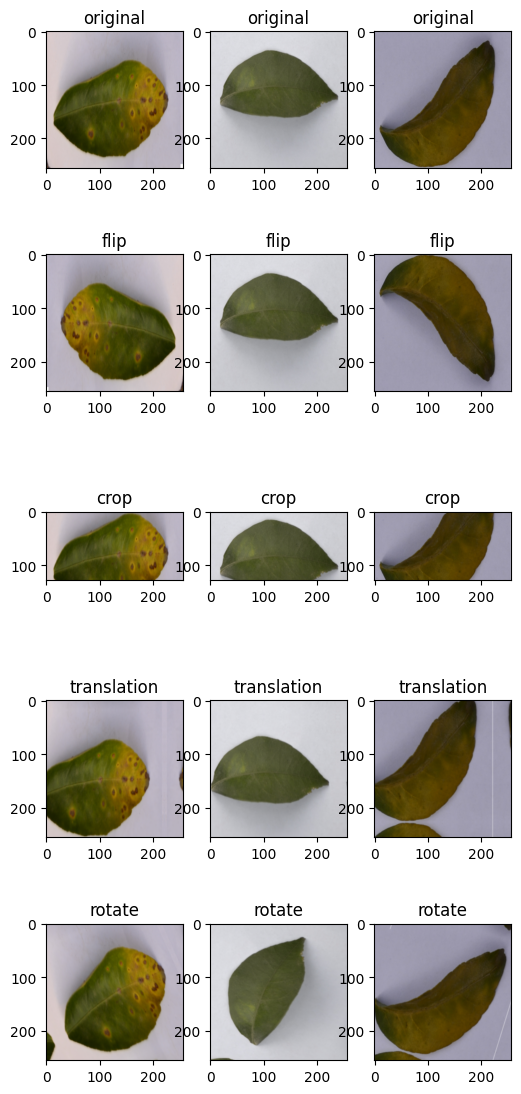

In [12]:
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        ax[1][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("flip")
        # crop
        ax[2][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("crop")
        # translation
        ax[3][i].imshow(translation(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("translation")
        # rotate
        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
plt.show()

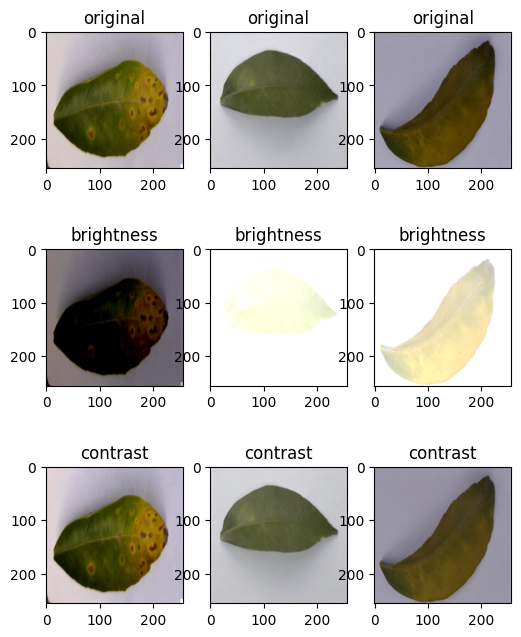

In [13]:
# Visualize images and augmentations
fig, ax = plt.subplots(3, 3, figsize=(6,8))
for sample in ds.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # brightness
        ax[1][i].imshow(brightness(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")
        # contrast
        ax[2][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
plt.show()

In [ ]:
# model=Sequential()
# model.add(tf.keras.layers.RandomFlip())
# model.add(tf.keras.layers.RandomCrop())
# model.add(Conv2D)
.....


## Text Data

In [23]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text ='The quick brown fox jumped over the lazy dog'
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [17]:
from tensorflow.keras.preprocessing.text import one_hot
words=set(text_to_word_sequence(text))
vocab_size=len(words)
vocab_size

8

In [20]:
one_hot(text,round(vocab_size*1.5))

[10, 5, 4, 1, 4, 10, 10, 4, 3]

In [24]:
from tensorflow.keras.preprocessing.text import hashing_trick
result=hashing_trick(text,round(vocab_size*1.5),hash_function='md5')
result

[7, 2, 8, 11, 7, 7, 7, 8, 11]

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

# word_counts
# word_docs
# word_index
# document_count

docs = ['Well done!',
		'Good work',
		'well Great effort done',
		'nice work',
		'Excellent work work!']

t=Tokenizer()
t.fit_on_texts(docs)

In [26]:
print(t.word_counts)
print(t.word_docs)
print(t.word_index)
print(t.index_word)
print(t.document_count)

OrderedDict([('well', 2), ('done', 2), ('good', 1), ('work', 4), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
defaultdict(<class 'int'>, {'well': 2, 'done': 2, 'good': 1, 'work': 3, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
{1: 'work', 2: 'well', 3: 'done', 4: 'good', 5: 'great', 6: 'effort', 7: 'nice', 8: 'excellent'}
5


In [27]:
t.texts_to_matrix(docs,mode='count')

array([[0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 1.]])

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = [
  "I enjoy coffee.",
  "I enjoy tea.",
  "I dislike milk.",
  "I am going to the supermarket later this morning for some coffee."
]

test_data = [
  "Enjoy coffee this morning.",
  "I enjoy going to the supermarket.",
  "Want some milk for your coffee?"
]

In [30]:
num_words=1000
oov_token='<UNK>'
pad_type='post'
trunc_type='post'

In [31]:
tokenizer=Tokenizer(num_words=num_words,oov_token=oov_token)
tokenizer.fit_on_texts(train_data)

In [33]:
word_index = tokenizer.word_index
word_index

{'<UNK>': 1,
 'i': 2,
 'enjoy': 3,
 'coffee': 4,
 'tea': 5,
 'dislike': 6,
 'milk': 7,
 'am': 8,
 'going': 9,
 'to': 10,
 'the': 11,
 'supermarket': 12,
 'later': 13,
 'this': 14,
 'morning': 15,
 'for': 16,
 'some': 17}

In [34]:
train_sequences=tokenizer.texts_to_sequences(train_data)
train_sequences

[[2, 3, 4], [2, 3, 5], [2, 6, 7], [2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 4]]

In [35]:
maxlen=max([len(x) for x in train_sequences])
maxlen

12

In [38]:
train_padded=pad_sequences(train_sequences,padding=pad_type, truncating=trunc_type,maxlen=maxlen)
train_padded

array([[ 2,  3,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  4]], dtype=int32)

In [39]:
test_sequences=tokenizer.texts_to_sequences(test_data)
test_sequences
test_padded=pad_sequences(test_sequences,padding=pad_type, truncating=trunc_type,maxlen=maxlen)
test_padded

array([[ 3,  4, 14, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  9, 10, 11, 12,  0,  0,  0,  0,  0,  0],
       [ 1, 17,  7, 16,  1,  4,  0,  0,  0,  0,  0,  0]], dtype=int32)